In [57]:
#Importing required libraries

#Libraries for data processing
import pandas as pd
import numpy as np

#Libraries for Visualization

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [58]:
# Module Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [59]:
#Getting data
data_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [60]:
# get overall info for the dataset 
data_df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [61]:
# Checking the number of rows(observations) and colmumns(variables)
data_df.skew(axis = 0, skipna = True)


PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [62]:
data_df.info()
data_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [63]:
#Displaying total no. of null values
total1=data_df.isnull().sum()
total2=data_df.isnull().count()
Missing_value=round(((total1/total2)*100),2)
Missing_value_df=pd.concat([total1, Missing_value], axis=1, keys=['Total', '%'])
Missing_value_df

,Total,%
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


In [64]:
#Displaying correlation for each variable
data_df.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


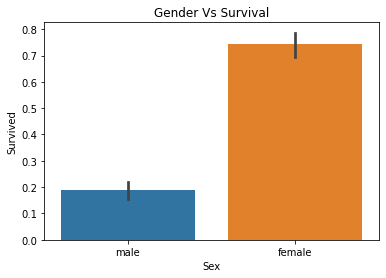

In [65]:
#Gender Vs Survival - Countplot
sns.barplot(x="Sex", y="Survived", data=data_df).set_title('Gender Vs Survival')
print("Percentage of females who survived:", data_df["Survived"][data_df["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", data_df["Survived"][data_df["Sex"] == 'male'].value_counts(normalize = True)[1]*100)
#The above Countplot shows that Female has number of survival.

Text(0.5, 0, 'Age')

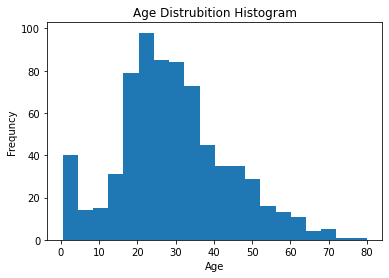

In [66]:
#Survival by AGE - Histogram
age=data_df['Age'][data_df.Age.notnull()] 
plt.hist(age ,20, histtype='stepfilled')
plt.ylabel('Frequncy')
plt.title('Age Distrubition Histogram')
plt.xlabel('Age')

Percentage of Class1 who survived: 62.96296296296296
Percentage of Class2 who survived: 47.28260869565217
Percentage of Class3 who survived: 24.236252545824847


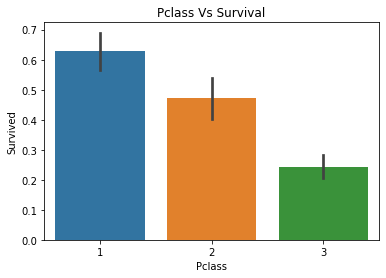

In [67]:
#Pclass Vs Survival - Barplot
sns.barplot(x='Pclass', y='Survived', data=data_df).set_title('Pclass Vs Survival')
#print percentages of females vs. males that survive
print("Percentage of Class1 who survived:", data_df["Survived"][data_df["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Class2 who survived:", data_df["Survived"][data_df["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Class3 who survived:", data_df["Survived"][data_df["Pclass"] == 3].value_counts(normalize = True)[1]*100)
#The above plot clearly shows that Pclass 1 has the most survival comparing to the other 2 class.

Text(0.5, 1.0, 'Parch Vs Survival')

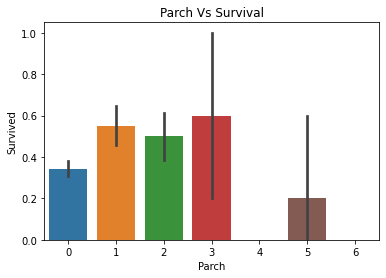

In [68]:
#Parch Vs Survival - Barplot
sns.barplot(x='Parch', y='Survived', data=data_df).set_title('Parch Vs Survival')

In [69]:
#Data Preprocessing
#By looking at the variables we will not require PassengerId hence will drop it.
data_df=data_df.drop(['PassengerId'],axis=1)
test_df1=test_df.drop(['PassengerId'],axis=1)
sub=test_df['PassengerId']

In [70]:
data_df['Ticket'].describe()
data_df['Cabin'].describe()
#It seens we have lots of unique values in both Ticket and Cabin variable, so it'll be tricky to use this variable. Hence we will drop it.
data_df=data_df.drop(['Ticket','Cabin'],axis=1)

test_df1=test_df1.drop(['Ticket','Cabin'],axis=1)

In [71]:
#Missing value interpretation
#Embarked
print('Number of people embarking in :',data_df['Embarked'].value_counts())
#We can add missing value as S, since we have most occurence value S.
data_df=data_df.fillna({"Embarked": "S"})
test_df1=test_df1.fillna({"Embarked": "S"})

Number of people embarking in : S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [72]:
#train Age
Mis_Age=data_df['Age'].isnull().sum()
mean=data_df['Age'].mean()
rand_age=np.random.randint(mean-10,mean+10,Mis_Age)
age_slice = data_df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data_df["Age"] = age_slice
data_df["Age"] = data_df["Age"].astype(int)
data_df["Age"]

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    31
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [73]:
#test Age
Mis_Age1=test_df1['Age'].isnull().sum()
mean1=test_df1['Age'].mean()
rand_age1=np.random.randint(mean1-10,mean1+10,Mis_Age1)
age_slice1 = test_df1["Age"].copy()
age_slice1[np.isnan(age_slice1)] = rand_age1
test_df1["Age"] = age_slice1
test_df1["Age"] = test_df1["Age"].astype(int)
test_df1["Age"]

0      34
1      47
2      62
3      27
4      22
       ..
413    23
414    39
415    38
416    23
417    35
Name: Age, Length: 418, dtype: int32

In [74]:
#Converting features
#Sex
Gender = {'male' : 0, 'female' : 1}
data_df['Gender']=data_df['Sex'].map(Gender)
test_df1['Gender']=test_df1['Sex'].map(Gender)

In [75]:
#Embarked
Embar_Mapping = {'S' : 0, 'C' : 1, 'Q' : 2}
data_df['Boarding'] = data_df['Embarked'].map(Embar_Mapping)
test_df1['Boarding'] = test_df1['Embarked'].map(Embar_Mapping)

In [76]:
# train Age
data_df['Age'] = data_df['Age'].astype(int)
data_df['Categories'] = data_df['Age']
data_df.loc[data_df['Age'] <= 14, 'Categories'] = 'Children'
data_df.loc[(data_df['Age'] >= 15) & (data_df['Age'] <= 24), 'Categories'] = 'Youth'
data_df.loc[(data_df['Age'] >= 25) & (data_df['Age'] <= 64), 'Categories'] = 'Adult'
data_df.loc[data_df['Age'] > 64, 'Categories'] = 'Senior'
data_df['Categories']
Age_Mapping = {'Children' : 0, 'Youth' : 1, 'Adult' : 2, 'Senior' : 3}
data_df['New_Age'] = data_df['Categories'].map(Age_Mapping)
data_df['New_Age']

0      1
1      2
2      2
3      2
4      2
      ..
886    2
887    1
888    2
889    2
890    2
Name: New_Age, Length: 891, dtype: int64

In [77]:
# test Age
test_df1['Age'] = test_df1['Age'].astype(int)
test_df1['Categories'] = test_df1['Age']
test_df1.loc[test_df1['Age'] <= 14, 'Categories'] = 'Children'
test_df1.loc[(test_df1['Age'] >= 15) & (test_df1['Age'] <= 24), 'Categories'] = 'Youth'
test_df1.loc[(test_df1['Age'] >= 25) & (test_df1['Age'] <= 64), 'Categories'] = 'Adult'
test_df1.loc[test_df1['Age'] > 64, 'Categories'] = 'Senior'
test_df1['Categories']
Age_Mapping = {'Children' : 0, 'Youth' : 1, 'Adult' : 2, 'Senior' : 3}
test_df1['New_Age'] = test_df1['Categories'].map(Age_Mapping)
test_df1['New_Age']

0      2
1      2
2      2
3      2
4      1
      ..
413    1
414    2
415    2
416    1
417    2
Name: New_Age, Length: 418, dtype: int64

In [78]:
test_df1

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Gender,Boarding,Categories,New_Age
0,3,"Kelly, Mr. James",male,34,0,0,7.8292,Q,0,2,Adult,2
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,7.0000,S,1,0,Adult,2
2,2,"Myles, Mr. Thomas Francis",male,62,0,0,9.6875,Q,0,2,Adult,2
3,3,"Wirz, Mr. Albert",male,27,0,0,8.6625,S,0,0,Adult,2
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,12.2875,S,1,0,Youth,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,23,0,0,8.0500,S,0,0,Youth,1
414,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,108.9000,C,1,1,Adult,2
415,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,7.2500,S,0,0,Adult,2
416,3,"Ware, Mr. Frederick",male,23,0,0,8.0500,S,0,0,Youth,1


In [79]:
#train Fare
data_df['Fare'] = data_df['Fare'].astype(int)
data_df['Expense'] = data_df['Fare']
data_df.loc[data_df['Fare'] < 8, 'Expense'] = '0'
data_df.loc[(data_df['Fare'] >= 8) & (data_df['Fare'] <= 15), 'Expense'] = '1'
data_df.loc[(data_df['Fare'] >= 16) & (data_df['Fare'] <= 30), 'Expense'] = '2'
data_df.loc[(data_df['Fare'] >= 31) & (data_df['Fare'] <= 100), 'Expense'] = '3'
data_df.loc[(data_df['Fare'] >= 101) & (data_df['Fare'] <= 250), 'Expense'] = '4'
data_df.loc[data_df['Fare'] > 250, 'Expense'] = '5'
data_df.Expense = data_df.Expense.astype(int)

In [80]:
#test Fare
#test_df1['Fare'] = test_df1['Fare'].astype(int)
test_df1['Expense'] = test_df1['Fare']
test_df1.loc[test_df1['Fare'] < 8, 'Expense'] = '0'
test_df1.loc[(test_df1['Fare'] >= 8) & (test_df1['Fare'] <= 15), 'Expense'] = '1'
test_df1.loc[(test_df1['Fare'] >= 16) & (test_df1['Fare'] <= 30), 'Expense'] = '2'
test_df1.loc[(test_df1['Fare'] >= 31) & (test_df1['Fare'] <= 100), 'Expense'] = '3'
test_df1.loc[(test_df1['Fare'] >= 101) & (test_df1['Fare'] <= 250), 'Expense'] = '4'
test_df1.loc[test_df1['Fare'] > 250, 'Expense'] = '5'

In [81]:
#train Name
data_df['Title'] = data_df['Name'].str.extract(' ([A-Za-z]+)\.' , expand=False)
data_df['Title'] = data_df['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Rev'], 'Rare')
data_df['Title'] = data_df['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
data_df['Title'] = data_df['Title'].replace(['Mlle'], 'Miss')
data_df['Title'] = data_df['Title'].replace(['Mme'], 'Mrs')
data_df['Title'] = data_df['Title'].replace(['Ms'], 'Miss')
pd.crosstab(data_df['Title'], data_df['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,1,19
Royal,2,1


In [82]:
#test Name
test_df1['Title'] = test_df1['Name'].str.extract(' ([A-Za-z]+)\.' , expand=False)
test_df1['Title'] = test_df1['Title'].replace(['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Rev'], 'Rare')
test_df1['Title'] = test_df1['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
test_df1['Title'] = test_df1['Title'].replace(['Mlle'], 'Miss')
test_df1['Title'] = test_df1['Title'].replace(['Mme'], 'Mrs')
test_df1['Title'] = test_df1['Title'].replace(['Ms'], 'Miss')
pd.crosstab(test_df1['Title'], test_df1['Sex'])

Sex,female,male
Title,,
Dona,1,0
Master,0,21
Miss,79,0
Mr,0,240
Mrs,72,0
Rare,0,5


In [83]:
Title_conv = {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Royal': 4, 'Rare': 5}
data_df.Title = data_df.Title.map(Title_conv)
test_df1.Title = test_df1.Title.map(Title_conv)

In [84]:
#Dropping the remaining variables after conversion
data_df = data_df.drop(['Sex','Embarked','Name','Fare','Age','Categories'], axis=1)
test_df1 = test_df1.drop(['Sex','Embarked','Name','Fare','Age','Categories'], axis=1)

In [85]:
data_df.head()

,Survived,Pclass,SibSp,Parch,Gender,Boarding,New_Age,Expense,Title
0,0,3,1,0,0,0,1,0,2
1,1,1,1,0,1,1,2,3,3
2,1,3,0,0,1,0,2,0,1
3,1,1,1,0,1,0,2,3,3
4,0,3,0,0,0,0,2,1,2


In [86]:
test_df1.tail()

,Pclass,SibSp,Parch,Gender,Boarding,New_Age,Expense,Title
413,3,0,0,0,0,1,1,2.0
414,1,0,0,1,1,2,4,NaN
415,3,0,0,0,0,2,0,2.0
416,3,0,0,0,0,1,1,2.0
417,3,1,1,0,1,2,2,0.0


In [87]:
test_df1.Title = test_df1.Title.fillna(0)
test_df1.Expense = test_df1.Expense.fillna(0)

test_df1.Title = test_df1.Title.astype(int)
test_df1.Expense = test_df1.Expense.astype(int)

In [88]:
#Splitting Train and Test dataset
from sklearn.model_selection import train_test_split
predictors = data_df.drop('Survived', axis=1)
target = data_df['Survived']

xtrain, xtest, Ytrain, Ytest = train_test_split(predictors, target, test_size=0.30, random_state=0)

In [89]:
#Accuracy score
from sklearn.metrics import accuracy_score

In [90]:
#Logistic Regression
LogReg = LogisticRegression()
LogReg.fit(xtrain, Ytrain)
y_pred = LogReg.predict(xtest)
Acc_LogReg = round(accuracy_score(y_pred,Ytest)*100, 2)

In [91]:
#Decision Tree
Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(xtrain, Ytrain)
y_pred = Decision_Tree.predict(xtest)
Acc_Decision_Tree = round(accuracy_score(y_pred,Ytest)*100, 2)

In [92]:
#Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(xtrain, Ytrain)
y_pred = randomforest.predict(xtest)
Acc_randomforest = round(accuracy_score(y_pred, Ytest)*100, 2)

In [93]:
#K Nearest Neighbor
knn = KNeighborsClassifier()
knn.fit(xtrain, Ytrain)
y_pred = knn.predict(xtest)
Acc_Knn = round(accuracy_score(y_pred, Ytest)*100, 2)

In [94]:
#Naive Bayes
Gaussian = GaussianNB()
Gaussian.fit(xtrain, Ytrain)
y_pred = Gaussian.predict(xtest)
Acc_Gaussian = round(accuracy_score(y_pred, Ytest)*100, 2)

In [95]:
#Showing all models accuracy
Result = pd.DataFrame({
        'Models' : ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Gaussian'],
        'Score' : [Acc_LogReg, Acc_Decision_Tree, Acc_randomforest, Acc_Knn, Acc_Gaussian]
        })
Result.sort_values(by='Score', ascending=False)

,Models,Score
2,Random Forest,82.46
3,KNN,81.72
1,Decision Tree,80.60
0,Logistic Regression,80.22
4,Gaussian,78.36


In [96]:
#Importance of each features under Decision Tree
Importance_Feature = pd.DataFrame({
        'Feature' : xtrain.columns, 
        'Importance' : np.round(randomforest.feature_importances_,3)
            })
Importance_Feature.sort_values(by='Importance', ascending=False)

,Feature,Importance
3,Gender,0.284
7,Title,0.159
6,Expense,0.131
0,Pclass,0.129
1,SibSp,0.089
5,New_Age,0.081
4,Boarding,0.066
2,Parch,0.061


In [97]:
#Conclusion
#From the above model we found that Random Forest Algorithm has given more accuracy than any other model.
#And it seems feature Gender has more importance in the Random Forest.

In [98]:
from sklearn.model_selection import cross_val_predict
matrix = cross_val_predict(randomforest, xtrain, Ytrain, cv =3)

In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytest, y_pred)

array([[130,  38],
       [ 20,  80]], dtype=int64)

In [100]:
from sklearn.metrics import precision_score, recall_score
print('Precision : ', precision_score(Ytest, y_pred))
print('Recall : ', recall_score(Ytest, y_pred))

Precision :  0.6779661016949152
Recall :  0.8


In [101]:
#from sklearn.metrics import f1_score
#f1_score(Ytest, y_pred)

In [105]:
#Logistic Regression final submission file
#Ypred_df = pd.DataFrame(LogReg.predict_proba(Final_test)[:,1])
Ypred_df = pd.DataFrame(randomforest.predict(test_df1))
Submission = pd.concat([sub,Ypred_df],axis=1)
Submission.columns = ['id','is_pass']
Submission.to_csv('RandomForest Submission.csv',index=False)

In [ ]:
test_df1.isnull().sum()

In [ ]:
test_df1.info()

In [ ]:
data_df.info()

In [ ]:
test_df1.Title.value_counts()

In [ ]:
test_df1[pd.isnull(test_df1['Expense'])]

In [ ]:
test_df[152:153]